# Rf 7 0 1_Efficiencyfit

Special p.d.f.'s: unbinned maximum likelihood fit of an efficiency eff(x) function to a dataset D(x,cut), cut is a category encoding a selection, which the efficiency as function of x should be described by eff(x)




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:01 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Construct efficiency function e(x)
-------------------------------------------------------------------

Declare variables x,mean, with associated name, title, value and allowed
range

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Efficiency function eff(x;a,b)

In [3]:
a = ROOT.RooRealVar("a", "a", 0.4, 0, 1)
b = ROOT.RooRealVar("b", "b", 5)
c = ROOT.RooRealVar("c", "c", -1, -10, 10)
effFunc = ROOT.RooFormulaVar(
    "effFunc", "(1-a)+a*cos((x-c)/b)", ROOT.RooArgList(a, b, c, x))

Construct conditional efficiency pdf E(cut|x)
------------------------------------------------------------------------------------------

Acceptance state cut (1 or 0)

In [4]:
cut = ROOT.RooCategory("cut", "cutr")
cut.defineType("accept", 1)
cut.defineType("reject", 0)

False

Construct efficiency p.d.f eff(cut|x)

In [5]:
effPdf = ROOT.RooEfficiency("effPdf", "effPdf", effFunc, cut, "accept")

Generate data (x, cut) from a toy model
-----------------------------------------------------------------------------

Construct global shape p.d.f shape(x) and product model(x,cut) = eff(cut|x)*shape(x)
(These are _only_ needed to generate some toy MC here to be used later)

In [6]:
shapePdf = ROOT.RooPolynomial(
    "shapePdf", "shapePdf", x, ROOT.RooArgList(ROOT.RooFit.RooConst(-0.095)))
model = ROOT.RooProdPdf(
    "model",
    "model",
    ROOT.RooArgSet(shapePdf),
    ROOT.RooFit.Conditional(
        ROOT.RooArgSet(effPdf),
        ROOT.RooArgSet(cut)))

Generate some toy data from model

In [7]:
data = model.generate(ROOT.RooArgSet(x, cut), 10000)

Fit conditional efficiency pdf to data
--------------------------------------------------------------------------

Fit conditional efficiency p.d.f to data

In [8]:
effPdf.fitTo(data, ROOT.RooFit.ConditionalObservables(ROOT.RooArgSet(x)))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a            4.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 c           -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=3887.11 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Plot fitted, data efficiency
--------------------------------------------------------

Plot distribution of all events and accepted fraction of events on frame

In [9]:
frame1 = x.frame(ROOT.RooFit.Bins(
    20), ROOT.RooFit.Title("Data (all, accepted)"))
data.plotOn(frame1)
data.plotOn(
    frame1,
    ROOT.RooFit.Cut("cut==cut::accept"),
    ROOT.RooFit.MarkerColor(
        ROOT.kRed),
    ROOT.RooFit.LineColor(
        ROOT.kRed))

<ROOT.RooPlot object ("frame_x_56372e89faa0") at 0x56372e89faa0>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 8176 events out of 10000 total events


Plot accept/reject efficiency on data overlay fitted efficiency curve

In [10]:
frame2 = x.frame(ROOT.RooFit.Bins(
    20), ROOT.RooFit.Title("Fitted efficiency"))
data.plotOn(frame2, ROOT.RooFit.Efficiency(cut))  # needs ROOT version >= 5.21
effFunc.plotOn(frame2, ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_56372f291b30") at 0x56372f291b30>

Draw all frames on a canvas

In [11]:
ca = ROOT.TCanvas("rf701_efficiency", "rf701_efficiency", 800, 400)
ca.Divide(2)
ca.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()
ca.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

ca.SaveAs("rf701_efficiencyfit.png")

Info in <TCanvas::Print>: png file rf701_efficiencyfit.png has been created


Draw all canvases 

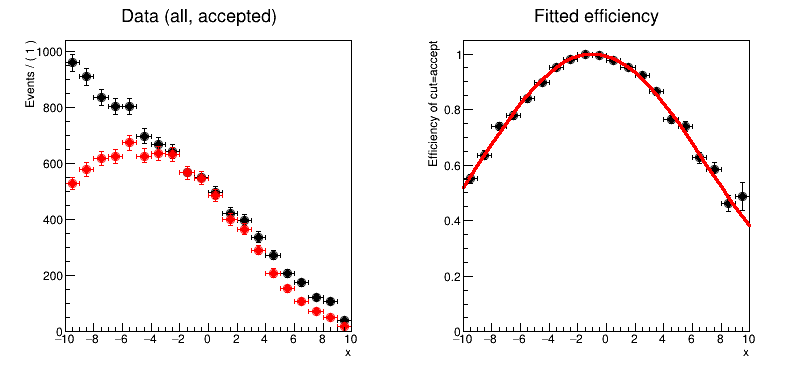

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()